In [42]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


import warnings
warnings.filterwarnings("ignore")

In [4]:
data= 'customer_booking.csv'

In [6]:
import chardet

def detect_encoding(file_path):
    with open(file_path, 'rb') as file:
        
        encoding_result = chardet.detect(file.read(100000))
    return encoding_result

encoding_info = detect_encoding('customer_booking.csv')
print(f"Detected encoding: {encoding_info['encoding']} with {encoding_info['confidence']*100}% confidence")

Detected encoding: ISO-8859-1 with 73.0% confidence


In [7]:
df= pd.read_csv(data, encoding='ISO-8859-1')

In [9]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


# Exploratory Data Analysis

In [10]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [11]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [12]:
df.booking_complete.value_counts()


booking_complete
0    42522
1     7478
Name: count, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [18]:
df['num_passengers'].value_counts()

num_passengers
1    31352
2    12804
3     2941
4     1784
5      561
6      289
7      114
8       89
9       66
Name: count, dtype: int64

In [19]:
df['length_of_stay'].value_counts()

length_of_stay
6      7757
5      7286
4      5655
3      2839
17     1849
       ... 
226       1
778       1
610       1
308       1
356       1
Name: count, Length: 335, dtype: int64

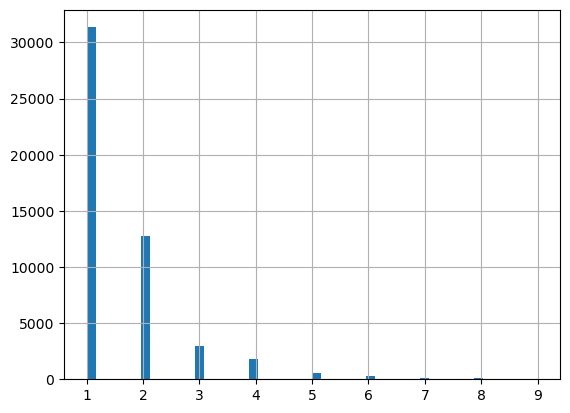

In [20]:
import matplotlib.pyplot as plt
df['num_passengers'].hist(bins=50)
plt.show()

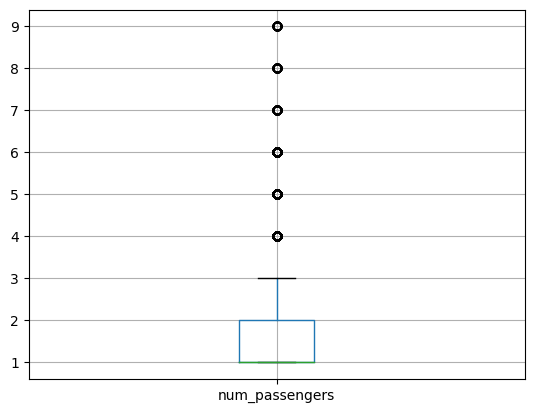

In [22]:
df.boxplot(column='num_passengers')  
plt.show()

# Mutual Information


In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']

# Initialize a LabelEncoder for each categorical column
encoders = {column: LabelEncoder() for column in X.select_dtypes(include=['object']).columns}

# Apply Label Encoding for categorical columns
for column, encoder in encoders.items():
    X[column] = encoder.fit_transform(X[column])

# Optionally, you can split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:

X.dtypes

num_passengers             int64
sales_channel              int64
trip_type                  int64
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
route                      int64
booking_origin             int64
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
dtype: object

In [25]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

def calculate_mutual_information(X, y):
    """
    Calculate mutual information scores between features in X and the target variable y.
    
    Parameters:
    - X: pandas DataFrame containing the input features.
    - y: pandas Series containing the target variable.
    
    Returns:
    - mi_scores: pandas Series containing mutual information scores indexed by feature names, sorted in descending order.
    """
    # Calculate mutual information scores
    mi_scores = mutual_info_classif(X, y)
    
    # Convert the scores into a pandas Series for easier handling, with feature names as the index
    mi_scores = pd.Series(mi_scores, index=X.columns, name="MI Scores")
    
    # Sort the Series so that the features with the highest MI scores are at the top
    mi_scores = mi_scores.sort_values(ascending=False)
    
    return mi_scores

# Assuming X and y are already defined and preprocessed as per your previous steps
# Now, call the function to calculate mutual information scores
mi_scores = calculate_mutual_information(X, y)

# Display the mutual information scores for the features
print(mi_scores.head())  # Adjust the number inside head() to display more or fewer top features


route                  0.050804
booking_origin         0.043505
flight_duration        0.015507
wants_extra_baggage    0.011248
length_of_stay         0.007253
Name: MI Scores, dtype: float64


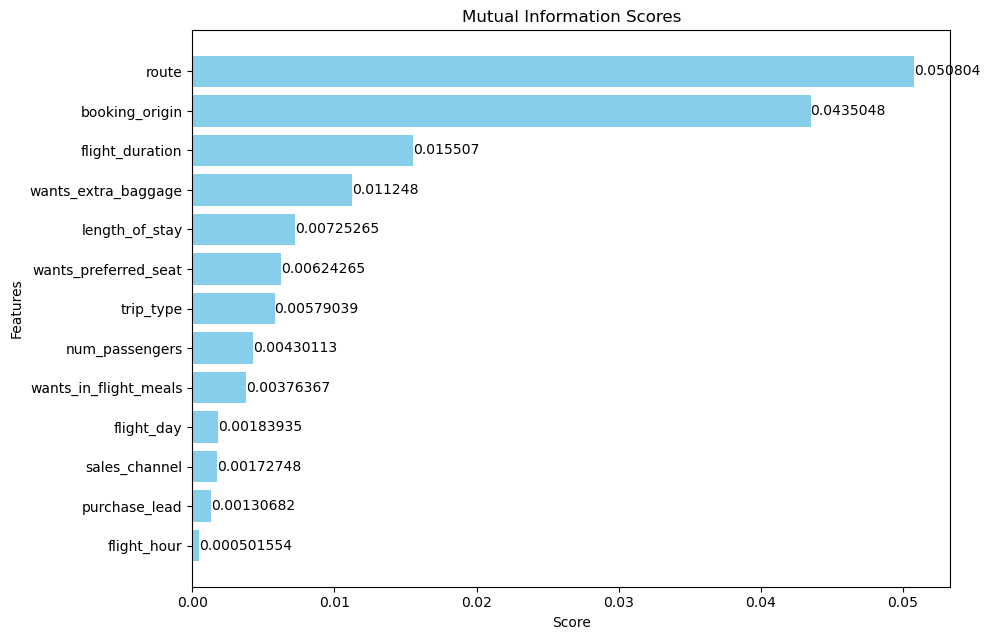

In [26]:
import matplotlib.pyplot as plt
import numpy as np

def plot_mi_scores(scores):
    """
    Plot mutual information scores using a horizontal bar chart.
    
    Parameters:
    - scores: pandas Series containing mutual information scores indexed by feature names, sorted in descending order.
    """
    # Sort scores for ascending plot
    scores = scores.sort_values(ascending=True)
    
    # Setup the matplotlib figure and axes for better layout and size
    plt.figure(figsize=(10, len(scores) / 2))  # Dynamically size the plot based on number of features
    ax = plt.gca()
    
    # Create horizontal bars
    bars = ax.barh(np.arange(len(scores)), scores, color='skyblue')
    ax.bar_label(bars)
    
    # Set y-ticks to feature names
    plt.yticks(np.arange(len(scores)), scores.index)
    
    # Set plot title and labels for clarity
    plt.title("Mutual Information Scores")
    plt.xlabel("Score")
    plt.ylabel("Features")
    
    # Improve layout
    plt.tight_layout()

# Assuming 'mi_scores' is already defined from previous steps
plot_mi_scores(mi_scores)
plt.show()

ValueError: Could not interpret value `duration` for parameter `y`

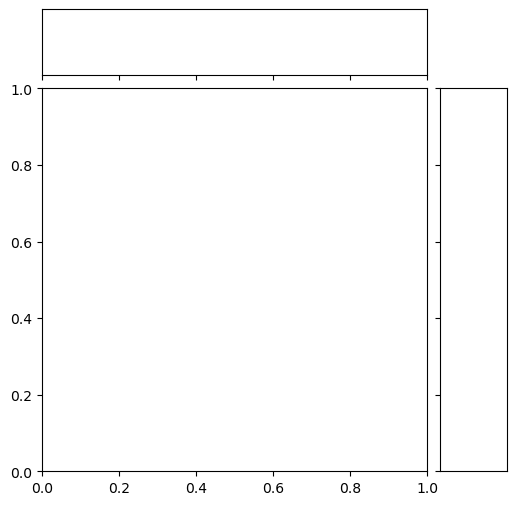

In [28]:
import seaborn as sns

# Ensure that you have the 'duration' column or choose another appropriate column from your DataFrame
sns.jointplot(data=df, x='route', y='duration')

In [29]:
#test train split

from sklearn.model_selection import train_test_split

# dataset split
# creating a function for dataset split
def dataset(X,y):
    train_full_X, val_X, train_full_y, val_y = train_test_split(X, y,test_size=0.2,random_state = 0)

# Use the same function above for the validation set
    train_X, test_X, train_y, test_y = train_test_split(train_full_X, train_full_y, test_size=0.25,random_state = 0)
    return (train_X, val_X, train_y, val_y)

In [30]:
from sklearn.preprocessing import MinMaxScaler

def scale(X):
    scaler = MinMaxScaler()
    scaler.fit(X)
    return X
     


# Model 1 : Random forest classifier with top 6 features


In [31]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier



#assigning the features under a list

features=['route','booking_origin','flight_duration','wants_extra_baggage', 'length_of_stay','num_passengers']
X= df[features]
#one hot encoding
X = pd.get_dummies(X, columns=features)
X= scale(X)
y= df.booking_complete       

X_train,X_val,y_train,y_val= dataset(X,y)

forest_model= RandomForestClassifier(random_state=1)
forest_model.fit(X_train, y_train)
preds= forest_model.predict(X_val)

print('ACCURACY: ',accuracy_score(y_val,preds)*100)
print('AUC score: ',roc_auc_score(y_val,preds))

ACCURACY:  83.37
AUC score:  0.5658407543873134


# Model 2 : Random forest classifier with all features


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
import pandas as pd

# Preparing the features and target variable
X = df.drop('booking_complete', axis=1)
X = pd.get_dummies(X)  # One-hot encoding for categorical variables

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y = df['booking_complete']

# Splitting the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

# Initializing and training the RandomForest model
forest_model = RandomForestClassifier(random_state=1)
forest_model.fit(X_train, y_train)

# Making predictions on the validation set
preds = forest_model.predict(X_val)

# Evaluating the model
accuracy = accuracy_score(y_val, preds) * 100
auc_score = roc_auc_score(y_val, preds)

print(f'ACCURACY: {accuracy:.2f}%')
print(f'AUC Score: {auc_score:.2f}')

# Additional evaluation metrics
print("\nClassification Report:\n", classification_report(y_val, preds))
print("Confusion Matrix:\n", confusion_matrix(y_val, preds))

ACCURACY: 85.25%
AUC Score: 0.56

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      8498
           1       0.54      0.13      0.21      1502

    accuracy                           0.85     10000
   macro avg       0.70      0.56      0.56     10000
weighted avg       0.82      0.85      0.81     10000

Confusion Matrix:
 [[8329  169]
 [1306  196]]


# 3-  XGB Classifier with Feature Selection: Identifying Top 6 Predictive Attributes






In [44]:
pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/03/e6/4aef6799badc2693548559bad5b56d56cfe89eada337c815fdfe92175250/xgboost-2.0.3-py3-none-macosx_12_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 10.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame and 'features' is the list of feature column names

# Define features and target
X = df[features]

# Apply one-hot encoding
X_encoded = pd.get_dummies(X, columns=features)

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

y = df['booking_complete']

# Splitting the dataset
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Get feature importances
importance = xgb_model.feature_importances_

# Sort features by importance
indices = np.argsort(importance)[::-1]
top_indices = indices[:6]  # Selecting top 6 features

# Selecting the top features for X_train and X_val
X_train_top = X_train[:, top_indices]
X_val_top = X_val[:, top_indices]

# Retrain model with top 6 features
xgb_top_features = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_top_features.fit(X_train_top, y_train)

# Making predictions with the top features model
predictions_top = xgb_top_features.predict(X_val_top)

# Evaluate the model
accuracy_top = accuracy_score(y_val, predictions_top) * 100
auc_score_top = roc_auc_score(y_val, predictions_top)

print(f'ACCURACY with Top 6 Features: {accuracy_top:.2f}%')
print(f'AUC Score with Top 6 Features: {auc_score_top:.2f}')

ACCURACY with Top 6 Features: 85.14%
AUC Score with Top 6 Features: 0.50


# Model 4 : XGB classifier with all features


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.feature_selection import SelectFromModel

# Preparing the data
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']

# One-hot encoding for categorical variables
X_encoded = pd.get_dummies(X)

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Splitting the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initial training to determine feature importance
initial_xgb_model = XGBClassifier(random_state=42)
initial_xgb_model.fit(X_train, y_train)

# Selecting features based on importance
thresholds = np.sort(initial_xgb_model.feature_importances_)[::-1][:10]  # Top 10 features
for thresh in thresholds:
    # Selecting features using threshold
    selection = SelectFromModel(initial_xgb_model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    
    # Training model
    selection_model = XGBClassifier(random_state=42)
    selection_model.fit(select_X_train, y_train)
    
    # Evaluating model
    select_X_val = selection.transform(X_val)
    predictions = selection_model.predict(select_X_val)
    accuracy = accuracy_score(y_val, predictions)
    auc_score = roc_auc_score(y_val, predictions)
    
    print(f"Threshold={thresh:.4f}, n={select_X_train.shape[1]}, Accuracy: {accuracy*100:.2f}%, AUC Score: {auc_score:.2f}")


Threshold=0.0752, n=1, Accuracy: 85.20%, AUC Score: 0.50
Threshold=0.0670, n=2, Accuracy: 85.20%, AUC Score: 0.50
Threshold=0.0215, n=3, Accuracy: 85.20%, AUC Score: 0.50
Threshold=0.0186, n=4, Accuracy: 85.14%, AUC Score: 0.50
Threshold=0.0176, n=5, Accuracy: 85.14%, AUC Score: 0.50
Threshold=0.0175, n=6, Accuracy: 85.14%, AUC Score: 0.50
Threshold=0.0161, n=7, Accuracy: 85.16%, AUC Score: 0.50
Threshold=0.0139, n=8, Accuracy: 85.16%, AUC Score: 0.50
Threshold=0.0138, n=9, Accuracy: 85.15%, AUC Score: 0.50
Threshold=0.0132, n=10, Accuracy: 85.16%, AUC Score: 0.50


Concluding that the random forest model, encompassing all features, stands as the optimal choice due to its superior accuracy and enhanced AUC score relative to alternative models.

Proceeding to verification using the test dataset.

In [49]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel






# Preparing the data
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']

# One-hot encoding for categorical variables
X_encoded = pd.get_dummies(X)

# Splitting the dataset into training and validation sets
train_full_X, test_X, train_full_y, test_y = train_test_split(X_encoded, y, test_size=0.2, random_state=0)

# Creating a pipeline with feature scaling, feature selection, and the classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectFromModel(RandomForestClassifier(random_state=1))),
    ('classifier', RandomForestClassifier(random_state=1))
])

# Setting up the hyperparameter grid
param_grid = {
    'feature_selection__estimator__n_estimators': [100, 200],  # Number of trees in the random forest
    'feature_selection__estimator__max_features': ['auto', 'sqrt'],  # Number of features to consider at every split
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],  # Maximum number of levels in tree
    'classifier__min_samples_split': [2, 5],  # Minimum number of samples required to split a node
    'classifier__min_samples_leaf': [1, 2],  # Minimum number of samples required at each leaf node
}

# Grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(train_full_X, train_full_y)

# Best model
best_model = grid_search.best_estimator_

# Predictions
preds = best_model.predict(test_X)

# Evaluation
accuracy = accuracy_score(test_y, preds) * 100
auc_score = roc_auc_score(test_y, preds)

print(f'Best Model Parameters: {grid_search.best_params_}')
print(f'ACCURACY: {accuracy:.2f}%')
print(f'AUC score: {auc_score:.2f}')

Best Model Parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200, 'feature_selection__estimator__max_features': 'sqrt', 'feature_selection__estimator__n_estimators': 100}
ACCURACY: 85.05%
AUC score: 0.52
